In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
kanada_data = pd.read_csv("kn_train.csv")
kanada_val = pd.read_csv("kn_val.csv")
kanada_test = pd.read_csv("Kannada_Test_Set_No_Labels.csv")
kanada_data = pd.concat([kanada_data, kanada_val], axis=0)

tamil_data = pd.read_csv("tamil_train.csv")
tamil_val = pd.read_csv("tamil_val.csv")
tamil_test = pd.read_csv("Tamil_Test_Set_No_Labels.csv")
tamil_data = pd.concat([tamil_data, tamil_val], axis=0)

tulu_data = pd.read_csv("tulu_train.csv")
tulu_val = pd.read_csv("tulu_val.csv")
tulu_test = pd.read_csv("Tulu_Test_Set_No_Labels.csv")
tulu_data = pd.concat([tulu_data, tulu_val], axis=0)

malayalam_data = pd.read_csv("mal_train.csv")
malayalam_val = pd.read_csv("mal_val.csv")
malayalam_test = pd.read_csv("Malayalam_Test_Set_No_Labels.csv")
malayalam_data = pd.concat([malayalam_data, malayalam_val], axis=0)

In [54]:
tulu_data = tulu_data.replace(".", "asterisk").fillna("")

tulu_mixed = tulu_data[tulu_data["Language"] == "Mixed"]
tulu_kan = tulu_data[tulu_data["Language"] == "Kannada"]
tulu_other = tulu_data[tulu_data["Language"] == "Other"]

tamil_name = tamil_data[tamil_data["Tag"] == "name"]
tamil_name["Tag"] = tamil_name["Tag"].replace("name", "Name")
tamil_name.columns = ["Words", "Language"]
kanada_name = kanada_data[kanada_data["Tag"] == "name"]
kanada_name["Tag"] = kanada_name["Tag"].replace("name", "Name")
kanada_name.columns = ["Words", "Language"]
tulu_name = tulu_data[tulu_data["Language"] == "Name"]
malayalam_name = malayalam_data[malayalam_data["Tag"] == "NAME"]
malayalam_name["Tag"] = malayalam_name["Tag"].replace("NAME", "Name")
malayalam_name.columns = ["Words", "Language"]

tamil_loc = tamil_data[tamil_data["Tag"] == "Location"]
tamil_loc.columns = ["Words", "Language"]
kanada_loc = kanada_data[kanada_data["Tag"] == "location"]
kanada_loc["Tag"] = kanada_loc["Tag"].replace("location", "Location")
kanada_loc.columns = ["Words", "Language"]
tulu_loc = tulu_data[tulu_data["Language"] == "Location"]
malayalam_loc = malayalam_data[malayalam_data["Tag"] == "PLACE"]
malayalam_loc["Tag"] = malayalam_loc["Tag"].replace("PLACE", "Location")
malayalam_loc.columns = ["Words", "Language"]


tulu_data = pd.concat([tulu_data, tulu_mixed, kanada_loc, tulu_loc, tulu_mixed, kanada_name, tulu_other, tulu_mixed, tulu_name, tulu_loc, tulu_other, tulu_mixed, tulu_loc, tulu_name, tamil_loc, tulu_kan, tulu_other, malayalam_loc, tulu_mixed, tulu_other]).fillna("")#.sample(frac=1)
tulu_data.head(50)

C:\Users\justa\AppData\Local\Temp\ipykernel_17056\2320674976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tamil_name["Tag"] = tamil_name["Tag"].replace("name", "Name")
C:\Users\justa\AppData\Local\Temp\ipykernel_17056\2320674976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kanada_name["Tag"] = kanada_name["Tag"].replace("name", "Name")
C:\Users\justa\AppData\Local\Temp\ipykernel_17056\2320674976.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Words,Language
0,Nice,English
1,Vedio,English
2,Super,English
3,athend,Tulu
4,Anda,Tulu
5,card,Mixed
6,deppunath,Tulu
7,H,English
8,deppunu,Tulu
9,Ponnu,Tulu


In [55]:
tulu_data.describe()

,Words,Language
count,48245,48245
unique,11160,8
top,asterisk,Tulu
freq,4665,12900


<Axes: xlabel='Language', ylabel='Count'>

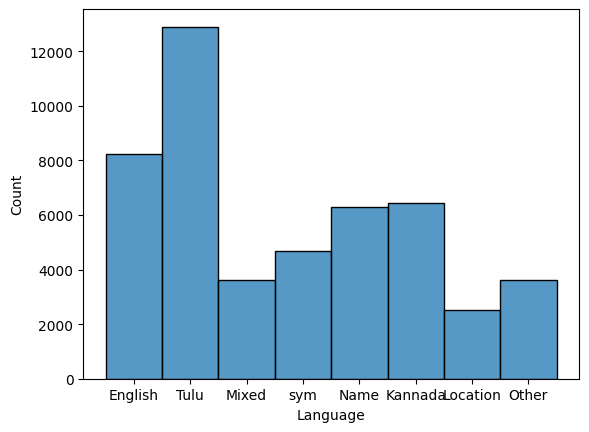

In [56]:
sb.histplot(tulu_data["Language"])

In [57]:
countVectorizer = CountVectorizer(ngram_range=(1,5), analyzer='char')

kf = KFold(n_splits=10, shuffle=True, random_state=42)

model1 = DecisionTreeClassifier(random_state=42)

model2 = LogisticRegression(solver='newton-cg', max_iter=2000)

model3 = svm.SVC()

model7 = VotingClassifier(
    estimators=[
        ('dtc', model1), 
        ('lr', model2), 
        ('svm', model3),
    ],
    voting='hard'
)

acc = [[], [], []] 
f1 = [[], [], []]
pre = [[], [], []]
rec = [[], [], []]

f1_a = [[], [], []]

In [66]:
X = tulu_data["Words"]
Y = tulu_data["Language"]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    

    train_vect_count = countVectorizer.fit_transform(X_train)
    test_vect_count = countVectorizer.transform(X_test)

    # MULTINOMIAL NAIVE BAYES CLASSIFICATION using COUNT VECTORIZATION
    model1.fit(train_vect_count, y_train)
    model1_predict = model1.predict(test_vect_count)

    acc[0].append(accuracy_score(y_test, model1_predict))
    f1[0].append(f1_score(y_test, model1_predict, average='macro'))
    f1_a[0].append(f1_score(y_test, model1_predict, average='weighted'))
    pre[0].append(precision_score(y_test, model1_predict, average='macro', zero_division=np.nan))
    rec[0].append(recall_score(y_test, model1_predict, average='macro', zero_division=np.nan))


    # MULTINOMIAL NAIVE BAYES CLASSIFICATION using TFIDF VECTORIZATION
    model2.fit(train_vect_count, y_train)
    model2_predict = model2.predict(test_vect_count)

    acc[1].append(accuracy_score(y_test, model2_predict))
    f1[1].append(f1_score(y_test, model2_predict, average='macro'))
    f1_a[1].append(f1_score(y_test, model2_predict, average='weighted'))
    pre[1].append(precision_score(y_test, model2_predict, average="macro", zero_division=np.nan))
    rec[1].append(recall_score(y_test, model2_predict, average="macro", zero_division=np.nan))

    # LOGISTIC REGRESSION using COUNT VECTORIZATION
    model3.fit(train_vect_count, y_train)
    model3_predict = model3.predict(test_vect_count)

    acc[2].append(accuracy_score(y_test, model3_predict))
    f1[2].append(f1_score(y_test, model3_predict, average="macro"))
    f1_a[2].append(f1_score(y_test, model3_predict, average="weighted"))
    pre[2].append(precision_score(y_test, model3_predict, average="macro", zero_division=np.nan))
    rec[2].append(recall_score(y_test, model3_predict, average="macro", zero_division=np.nan))


In [67]:
DTC = ["Decision Tree Classifier",sum(acc[0])/len(acc[0]), sum(f1[0])/len(f1[0]), sum(f1_a[0])/len(f1_a[0]),sum(pre[0])/len(pre[0]), sum(rec[0])/len(rec[0])]
Logistic = ["Logistic Regression", sum(acc[1])/len(acc[1]), sum(f1[1])/len(f1[1]), sum(f1_a[1])/len(f1_a[1]), sum(pre[1])/len(pre[1]), sum(rec[1])/len(rec[1])]
SVM = ["Support Vector Machine",sum(acc[2])/len(acc[2]), sum(f1[2])/len(f1[2]), sum(f1_a[2])/len(f1_a[2]), sum(pre[2])/len(pre[2]), sum(rec[2])/len(rec[2])]

fields = ["Model Name", "Accuracy", "F1 Score (Macro)", "F1 Score (Weighted)", "Precision", "Recall Score"]

table = PrettyTable(field_names=fields)
table.add_rows([DTC, Logistic, SVM])
table

Model Name,Accuracy,F1 Score (Macro),F1 Score (Weighted),Precision,Recall Score
Decision Tree Classifier,0.922167878225453,0.9321242867445683,0.9220807650773339,0.9244014297800882,0.9410410289215889
Logistic Regression,0.9301895530980675,0.9381025775792059,0.9301191476645453,0.9353032977997987,0.9411793831648447
Support Vector Machine,0.9161155406044046,0.9256869520842594,0.9159882681623005,0.929596383423215,0.9223231629477698


In [58]:
x_train = tulu_data["Words"]
y_train = tulu_data["Language"]
x_test = tulu_val["Words"].replace(".", "asterisk").fillna("")
y_test = tulu_val["Language"]

count_vec_train = countVectorizer.fit_transform(x_train)
count_vec_test = countVectorizer.transform(x_test)

model7.fit(count_vec_train, y_train)
model7_predict = model7.predict(count_vec_test)

print(classification_report(y_test, model7_predict), "\n")

              precision    recall  f1-score   support

     English       0.97      0.97      0.97       742
     Kannada       0.89      0.94      0.92       273
    Location       0.95      0.98      0.96        41
       Mixed       1.00      0.98      0.99        57
        Name       0.89      0.94      0.92       135
       Other       0.83      0.92      0.87        85
        Tulu       0.98      0.96      0.97      1251
         sym       1.00      1.00      1.00       422

    accuracy                           0.96      3006
   macro avg       0.94      0.96      0.95      3006
weighted avg       0.97      0.96      0.97      3006
 



In [59]:
x_train = tulu_data["Words"]
y_train = tulu_data["Language"]
final_test = pd.read_csv("Tulu_Test_Set_No_Labels.csv")
x_test = final_test["Word"].replace(".", "asterisk").fillna("")

count_vec_train = countVectorizer.fit_transform(x_train)
count_vec_test = countVectorizer.transform(x_test)

model7.fit(count_vec_train, y_train)
pred = model7.predict(count_vec_test)

result = pd.concat([final_test.reset_index(drop=True), pd.Series(pred, name="Tag")], axis=1)
result.to_csv('predictions.csv', index=False)

In [60]:
ans = pd.read_csv("predictions.csv")
ans["Tag"].value_counts()

Tag
Tulu        1315
English      801
sym          465
Kannada      382
Name         156
Other         64
Location      59
Mixed         41
Name: count, dtype: int64

In [65]:
ans[ans["Tag"] == "Kannada"]

,Word,Tag
0,Kathe,Kannada
5,nataka,Kannada
11,anna,Kannada
16,sakathagi,Kannada
24,thikko,Kannada
...,...,...
3226,pathrakku,Kannada
3228,thorisi,Kannada
3248,maaya,Kannada
3265,Chindhi,Kannada


In [62]:
ans[ans["Tag"] == "Name"]

,Word,Tag
4,appu,Name
9,chotu,Name
26,jai,Name
99,shivanna,Name
100,Vijayanna,Name
...,...,...
3143,Naveen,Name
3177,angadi,Name
3221,Arvind,Name
3266,chitranna,Name
